In [1]:
# Practical 9
# Implement Balanced and Imbalanced Multiclass Classification								
# https://www.geeksforgeeks.org/handling-imbalanced-data-for-classification/								
# https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a								
# https://medium.com/@daniele.santiago/balancing-imbalanced-data-undersampling-and-oversampling-techniques-in-python-7c5378282290								
# https://machinelearningmastery.com/multi-class-imbalanced-classification/								

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("iris.csv")
print("Dataset Head:\n", df.head())
print("\nClass Distribution:\n", df['species'].value_counts())

Dataset Head:
    sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Class Distribution:
 species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [8]:
# Prepare data for balanced classification
X = df.drop('species', axis=1).values
y = df['species'].values

In [9]:
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [11]:
df_imb = pd.concat([
    df[df['species'] == 'Iris-setosa'],
    df[df['species'] == 'Iris-versicolor'],
    df[df['species'] == 'Iris-virginica'].sample(10, random_state=42)  # Correct label
])

In [13]:
# Train logistic regression on balanced data
clf_bal = LogisticRegression(max_iter=200)
clf_bal.fit(X_train_bal, y_train_bal)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [15]:
# Train logistic regression on imbalanced data
clf_imb = LogisticRegression(max_iter=200)
clf_imb.fit(X_train_imb, y_train_imb)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [16]:
y_pred_bal = clf_bal.predict(X_test_bal)
y_pred_imb = clf_imb.predict(X_test_imb)

In [17]:
# Evaluate performance
print("===== Balanced Dataset =====")
print(classification_report(y_test_bal, y_pred_bal))
print("Confusion Matrix:\n", confusion_matrix(y_test_bal, y_pred_bal))

===== Balanced Dataset =====
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      0.93      0.90        15
 Iris-virginica       0.93      0.87      0.90        15

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45

Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]


In [18]:
print("\n===== Imbalanced Dataset =====")
print(classification_report(y_test_imb, y_pred_imb))
print("Confusion Matrix:\n", confusion_matrix(y_test_imb, y_pred_imb))



===== Imbalanced Dataset =====
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.67      0.80         3

       accuracy                           0.97        33
      macro avg       0.98      0.89      0.92        33
   weighted avg       0.97      0.97      0.97        33

Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1  2]]


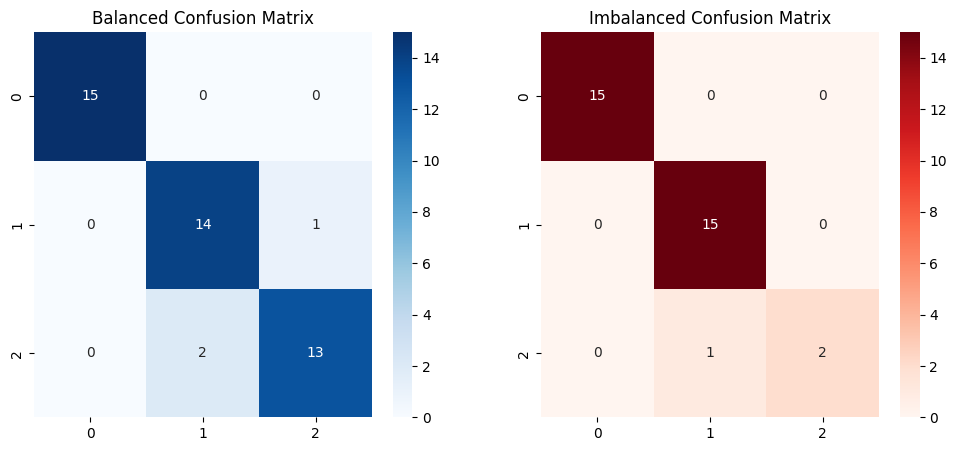

In [19]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test_bal, y_pred_bal), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Balanced Confusion Matrix")

sns.heatmap(confusion_matrix(y_test_imb, y_pred_imb), annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title("Imbalanced Confusion Matrix")

plt.show()